Remember to upload the Data files and R functions file before loading the codes:
1. AU_New_Data_With_EPU.xlsx
2. functions.R


In [1]:
#Installing libraries:
install.packages("openxlsx")
install.packages("stargazer")
install.packages("parallel")
install.packages("moments")
install.packages("urca")
install.packages("WeightedPortTest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘parallel’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# Libraries Loading:
library("openxlsx")
library("stargazer")
library("parallel")
library("moments")
library("urca")
library("WeightedPortTest")


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 




In [3]:
# I created a R file functions list as described in the beginning of the notebook. The files contain functions to run analysis related to the TVP-VAR connectedness:
source("functions.R")

In [4]:
# Data Loading:
RAW = read.xlsx("./AU_New_Data_With_EPU.xlsx", detectDates=TRUE, 1)
RAW = na.omit(RAW)
print(str(RAW))

DATA = RAW[,-1]
k = ncol(DATA)
k
print(paste("Using", k, "series, namely:"))
NAMES = colnames(DATA)
print(NAMES)
DATE = as.Date(RAW[,1], "%Y-%m-%d")
print(paste("From", DATE[1], "to", DATE[length(DATE)]))

'data.frame':	226 obs. of  7 variables:
 $ Date : Date, format: "2004-10-01" "2004-11-01" ...
 $ Brent: num  14.18 -14.39 -8.49 11.69 2.16 ...
 $ Gold : num  2.43 5.09 -2.8 -3.68 3.03 ...
 $ ASX50: num  2.38 4.23 2.96 1.13 2.61 -1.76 -2.76 3.05 3.96 2.36 ...
 $ AUDI : num  2.459 1.76 -0.629 0.475 1.417 ...
 $ EPU  : num  88.8 43.5 43.8 34.7 32.4 ...
 $ OPU  : num  301 243 164 105 127 ...
NULL


[1] 6

[1] "Using 6 series, namely:"
[1] "Brent" "Gold"  "ASX50" "AUDI"  "EPU"   "OPU"  
[1] "From 2004-10-01 to 2023-07-01"


In [5]:
#Transforming data into matrix:
date = DATE
Y = matrix(NA, ncol=k, nrow=nrow(DATA))
for (i in 1:k) {
  Y[,i] = (DATA[,i])
}

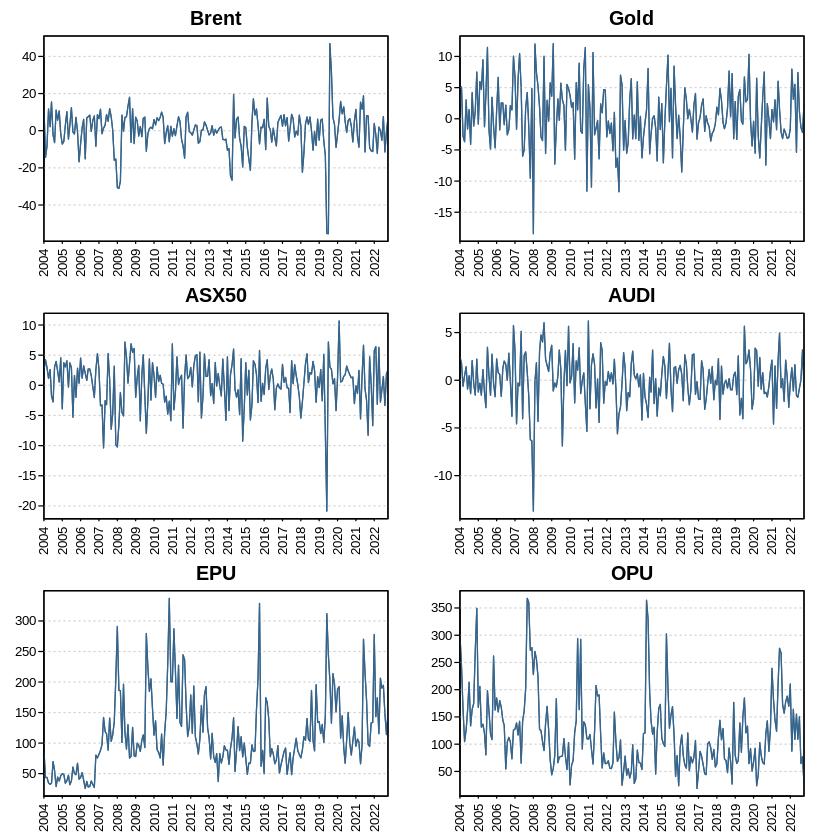

In [6]:
# Time-series Plots:
split = 2
par(mfrow=c(ceiling(k/split),split), oma=c(0.5,0.5,0,0), mar=c(1.5,1,1.5,1), mgp=c(0.5,0.5,0), mai=c(0.3,0.3,0.3,0.3))
for (i in 1:k) {
  plot(date, Y[,i], type="l", las=1, xlab="", ylab="", main=NAMES[i], col="steelblue4",
       xaxs="i", xaxt="n", cex.axis=1, cex.main=1.5, tck=-0.025)
  grid(NA, NULL)
  lines(date, Y[,i], col="steelblue4")
  axis.Date(side=1, date, at=seq(date[1], tail(date, 1), by="years"), format="%Y", las=2, tck=-0.01, cex.axis=1)
  box()
}


In [7]:
### Descriptive Statistics:
print("Summary Statistics")
colnames(Y) = NAMES
summary_statistics = Moments(Y)
print(summary_statistics)

[1] "Summary Statistics"
         Brent        Gold        ASX50        AUDI        EPU         
Mean     "0.2732"     "0.6844"    "0.3873"     "0.036"     "114.3868"  
Variance "120.3101"   "23.5148"   "15.8615"    "6.7071"    "3831.1203" 
Skewness "-1.126***"  "-0.146"    "-1.033***"  "-0.704***" "1.127***"  
         "(0.000)"    "(0.356)"   "(0.000)"    "(0.000)"   "(0.000)"   
Kurtosis "6.474***"   "0.575*"    "2.954***"   "2.902***"  "1.228***"  
         "(0.000)"    "(0.090)"   "(0.000)"    "(0.000)"   "(0.005)"   
JB       "442.480***" "3.921"     "122.368***" "97.941***" "62.035***" 
         "(0.000)"    "(0.141)"   "(0.000)"    "(0.000)"   "(0.000)"   
ERS      "-2.720***"  "-5.090***" "-4.501***"  "-3.400***" "-3.169***" 
         "(0.007)"    "(0.000)"   "(0.000)"    "(0.001)"   "(0.002)"   
Q(20)    "33.140**"   "20.075"    "20.868"     "19.800"    "401.007***"
         "(0.033)"    "(0.453)"   "(0.405)"    "(0.470)"   "(0.000)"   
Q2(20)   "149.744***" "22.399***" "12.7

In [8]:
# TVP-VAR Model parameter setting:
p = 3  # lag length
H = 10 # forecast horizon
prior = UninformativePrior(0.1, k, p)
prior
tvpvar = TVPVAR(Y, l=c(0.99, 0.99), p, prior)
B_t = tvpvar$beta_t
Q_t = tvpvar$Q_t

0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,0,0,0,0,0,0,0,0,0,0
0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,0,0,0,0,0,0,0,0,0,0
0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,0,0,0,0,0,0,0,0,0,0
0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,⋯,0,0,0,0,0,0,0,0,0,0
0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,⋯,0,0,0,0,0,0,0,0,0,0
0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,⋯,0,0,0,0,0,0,0,0,0,0
0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,⋯,0,0,0,0,0,0,0,0,0,0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,⋯,0,0,0,0,0,0,0,0,0,0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,⋯,0,0,0,0,0,0,0,0,0,0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,⋯,0,0,0,0,0,0,0,0,0,0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,0,0,0,0,0,0,0,0,0,0


In [9]:
###Table: Averaged connectedness based on TVP-VAR-DY model
dy12 = DY12(B_t, Q_t, H, NAMES)
CT_dy12 = dy12$CT
TOTAL_dy12 = dy12$TOTAL
NET_dy12 = dy12$NET
NPSO_dy12 = dy12$NPSO
print("DY12; Averaged connectedness table")
print(dy12$TABLE)


[1] "DY12; Averaged connectedness table"
      Brent    Gold     ASX50    AUDI     EPU      OPU      FROM    
Brent "63.44"  " 2.08"  " 6.98"  " 8.74"  " 9.84"  " 8.92"  "36.56" 
Gold  " 2.87"  "71.57"  " 1.23"  "11.46"  " 8.68"  " 4.18"  "28.43" 
ASX50 " 4.54"  " 0.95"  "67.49"  "11.31"  "11.52"  " 4.19"  "32.51" 
AUDI  " 7.85"  " 9.64"  " 9.74"  "59.48"  " 8.66"  " 4.63"  "40.52" 
EPU   " 3.84"  " 0.41"  " 4.16"  " 4.39"  "82.00"  " 5.21"  "18.00" 
OPU   " 2.64"  " 0.83"  " 1.07"  " 0.77"  " 5.04"  "89.65"  "10.35" 
TO    "21.75"  "13.91"  "23.18"  "36.66"  "43.75"  "27.12"  "166.36"
NET   "-14.82" "-14.52" " -9.33" " -3.86" " 25.75" " 16.78" "TCI"   
NPDC  " 1.00"  " 0.00"  " 2.00"  " 3.00"  " 4.00"  " 5.00"  "27.73" 


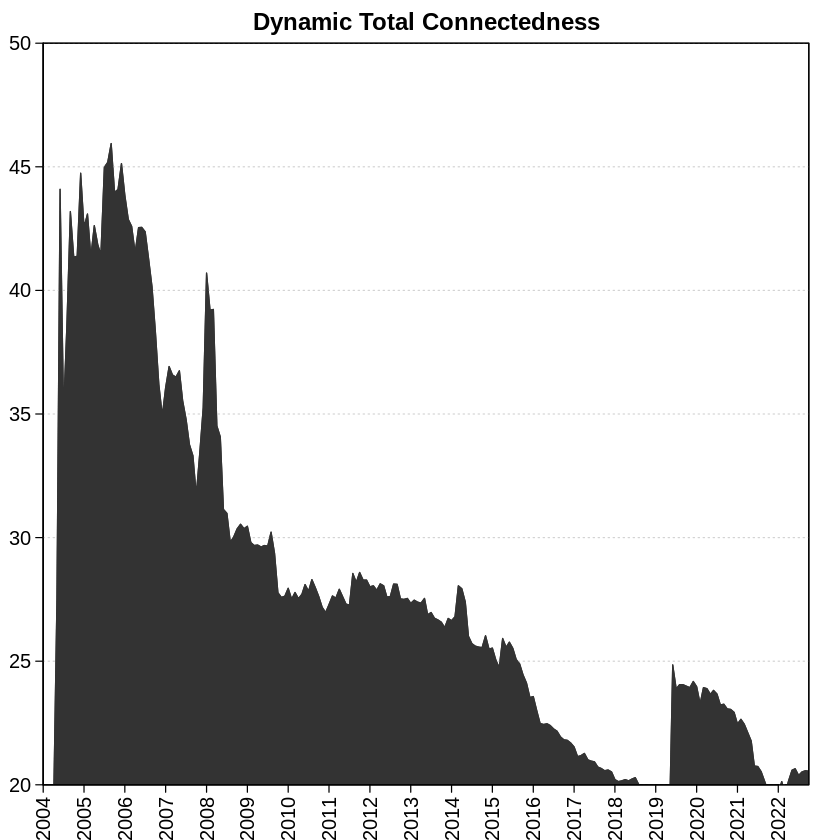

In [10]:
### CONNECTEDNESS PLOTS ----
# DYNAMIC TOTAL CONNECTEDNESS:
t = length(TOTAL_dy12)
par(mfcol=c(1,1), oma=c(0.5,0.5,0,0), mar=c(1.5,1,1.5,1)+0.3, mgp=c(0.5,0.5,0))
plot(date, TOTAL_dy12, type="l",xaxs="i",col="grey20", las=1, main="Dynamic Total Connectedness",ylab="",ylim=c(20,50),yaxs="i",xlab="",tck=-0.01,xaxt="n", cex.axis=1)
grid(NA,NULL,lty=3)
polygon(c(date, rev(date)), c(rep(0, t), rev(TOTAL_dy12)), col="grey20", border="grey20")
axis.Date(side=1, date, at=seq(date[1], tail(date, 1), by="years"), format="%Y", las=2, tck=-0.01, cex.axis=1)
box()

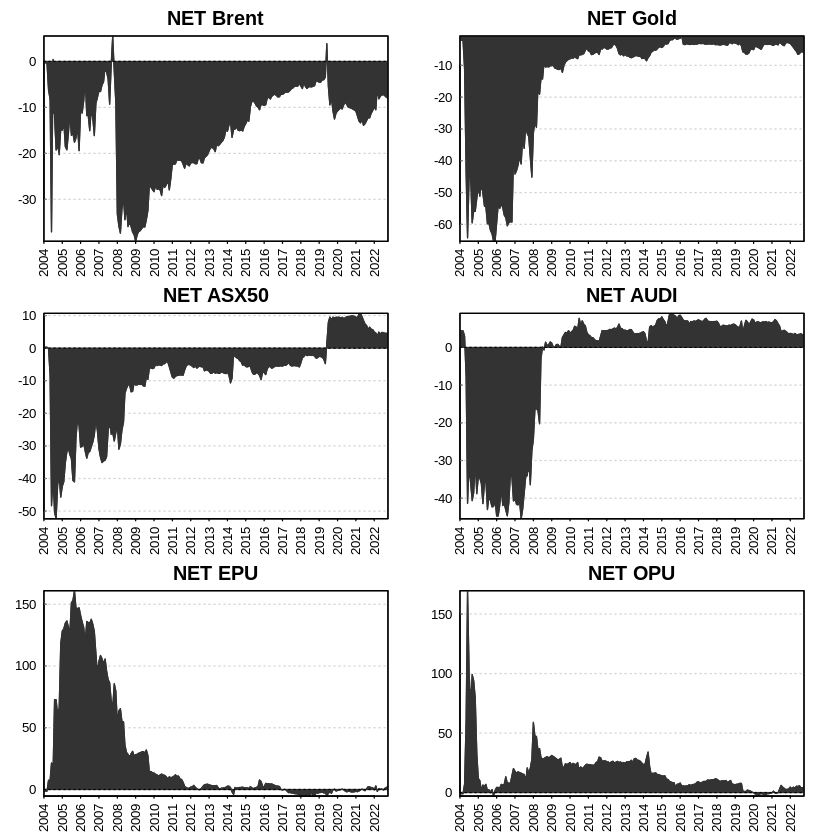

In [11]:
# NET TOTAL DIRECTIONAL CONNECTEDNESS:
par(mfrow=c(ceiling(k/split),split), oma=c(0.5,0.5,0,0), mar=c(1.5,1,1.5,1), mgp=c(0.5,0.5,0), mai=c(0.3,0.3,0.3,0.3))
for (i in 1:k){
  plot(date, NET_dy12[,i], xlab="", ylab="", type="l", xaxs="i", col="grey20", las=1, main=paste("NET",NAMES[i]),tck=0.01,yaxs="i",xaxt="n",cex.axis=1,cex.main=1.5)
  grid(NA, NULL, lty=3)
  polygon(c(date, rev(date)), c(rep(0, t), rev(NET_dy12[,i])), col="grey20", border="grey20")
  abline(h=0, lty=3)
  axis.Date(side=1, date, at=seq(date[1], tail(date, 1), by="years"), format="%Y", las=2, tck=-0.01, cex.axis=1)
  box()
}

In [12]:
p = 3  # lag length
H = 10 # forecast horizon
prior = UninformativePrior(0.1, k, p)
tvpvar = TVPVAR(Y, l=c(0.99, 0.99), p, prior)
B_t = tvpvar$beta_t
Q_t = tvpvar$Q_t

dy12 = DY12(B_t, Q_t, H, NAMES)
ct_dy12 = dy12$CT
npso_dy12 = -dy12$NPSO
lw20 = LW20(B_t, Q_t, H, NAMES)
ct_lw20 = lw20$CT
npso_lw20 = lw20$NPSO


[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

In [13]:
### NET PAIRWISE DIRECTIONAL CONNECTEDNESS (figure 4)
png("AU NET PAIRWISE DIRECTIONAL CONNECTEDNESS.png", width = 600, height = 1200)
kk = k*(k-1)/2
lk = ceiling(sqrt(2))
par(mfrow=c(ceiling(kk/lk),lk), oma=c(0.5,0.5,0,0), mar=c(1.5,1,1.5,1), mgp=c(0.5,0.5,0),mai=c(0.3,0.3,0.3,0.3))
for (i in 1:k) {
  for (j in 1:k) {
    if (i<j) {
      plot(DATE, npso_dy12[j,i,], xlab="", ylab="", type="l", xaxs="i", col="grey20", las=1, main=paste0(NAMES[i],"-",NAMES[j]), tck=-0.02, yaxs="i", ylim=c(-10,10), xaxt="n", cex.axis=1.25, cex.main=1.5)
      grid(NA, NULL)
      polygon(c(DATE, rev(DATE)), c(rep(0, length(DATE)), rev(npso_dy12[j,i,])), col="grey20", border="grey20")
      axis.Date(side=1, DATE, at=seq(DATE[1], tail(DATE, 1), by="years"), format="%Y", las=2, tck=-0.01, cex.axis=1.25)
      box()
    }
  }
}
dev.off()  # Figure 4 will be stored as a png in the path to the code file

pdf 
  2